In [48]:
import pandas as pd
import numpy as np
from sklearn import ensemble
import pylab as pl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


//anaconda/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['std', 'clf', 'indices', 'f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [ ]:
#download data from kaggle titanic challenge

In [2]:
titanic = pd.read_csv("train.csv").dropna(subset=["Survived", "Sex", "Pclass", "Age"])

In [3]:
titanic.shape

(714, 12)

In [4]:
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


map gender to a binary 0-1 variable

In [5]:
titanic["gender"] = titanic.Sex.map({'male':0, 'female':1})

only use 3 variables for clarity

In [23]:
titanic_short = titanic[["Pclass", "gender", "Age"]].dropna()


In [24]:
titanic_short.values

array([[  3.,   0.,  22.],
       [  1.,   1.,  38.],
       [  3.,   1.,  26.],
       ..., 
       [  1.,   1.,  19.],
       [  1.,   0.,  26.],
       [  3.,   0.,  32.]])

target variable is survival

In [25]:
titanic[["Survived"]].values.shape, titanic_short.shape

((714, 1), (714, 3))

In [ ]:
use random forest to predict

In [26]:
ensemble.RandomForestClassifier

sklearn.ensemble.forest.RandomForestClassifier

In [ ]:
#score tells me the overall performance

In [27]:
clf =  ensemble.RandomForestClassifier().fit(titanic_short.values, titanic["Survived"])
clf.score(titanic_short.values, titanic["Survived"])

0.88515406162464982

cross validation will give me a better sense of the score. if the score on test and train is very different im overfitting

In [29]:
from sklearn import metrics, cross_validation

X_train, X_test, y_train, y_test = cross_validation.train_test_split(titanic_short.values, 
                                                            titanic["Survived"], test_size=0.33, random_state=42)

In [59]:
clf =  ensemble.RandomForestClassifier().fit(X_train, y_train)
clf.score(X_test, y_test)

0.79661016949152541

confusion matrix

In [60]:
metrics.confusion_matrix(y_test, clf.predict(X_test))

array([[120,  17],
       [ 31,  68]])

future iportance: which feature contributes  to the classification

In [61]:
importances = clf.feature_importances_
importances

array([ 0.16630248,  0.33742648,  0.49627104])

because the random forest is an ensamble (runs a bunch of trees) I can plot the standard deviation of the importance

Feature ranking:
1. feature 2 (0.436466)
2. feature 1 (0.385983)
3. feature 0 (0.177552)


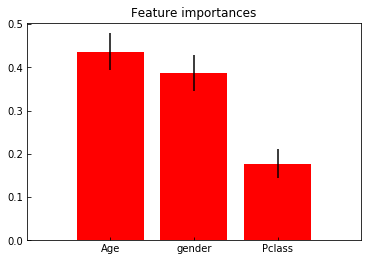

In [56]:
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_test.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
pl.figure()
pl.title("Feature importances")
pl.bar(range(X_test.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
pl.xticks(range(X_test.shape[1]), titanic_short.columns[indices])
pl.xlim([-1, X_test.shape[1]])

pl.show()
